# Papcorns Data Scientist Task - Getting Started

This notebook will help you get started with the Papcorns data scientist technical assessment. We'll show you how to:
1. Install requirements and do the imports
2. Connect to the SQLite database
3. Load the data into pandas DataFrames

First, let's import the required libraries:

## Installing Requirements

Let's install the required libraries:

In [563]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Imports

Let's do the imports:

In [564]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
# plt.style.use('seaborn')
# sns.set_palette('deep')

## Connecting to the Database

Let's establish a connection to the SQLite database:

In [565]:
# Connect to the SQLite database
conn = sqlite3.connect('papcorns.sqlite')

## Exploring the Data Structure

Let's look at the structure of our tables:

In [566]:
# Load users table
users_df = pd.read_sql_query("SELECT * FROM users LIMIT 5;", conn)
print("Users table preview:")
display(users_df)

# Load events table
events_df = pd.read_sql_query("SELECT * FROM user_events LIMIT 5;", conn)
print("\nUser events table preview:")
display(events_df)

Users table preview:


,id,created_at,attribution_source,country,name
0,1,2024-05-07T00:00:00,instagram,US,Eve Brown
1,2,2024-10-12T00:00:00,instagram,NL,Frank Moore
2,3,2024-10-15T00:00:00,tiktok,TR,Ivy Anderson
3,4,2024-08-28T00:00:00,tiktok,TR,Alice Brown
4,5,2024-04-03T00:00:00,organic,NL,Bob Moore



User events table preview:


,id,created_at,user_id,event_name,amount_usd
0,1,2024-05-07T00:00:00,1,app_install,None
1,2,2024-05-12T00:00:00,1,trial_started,None
2,3,2024-05-24T00:00:00,1,trial_cancelled,None
3,4,2024-10-12T00:00:00,2,app_install,None
4,5,2024-10-13T00:00:00,2,trial_started,None


## Core Tasks (Pandas)



In [567]:
df_1 = pd.read_sql_query("SELECT * FROM users;", conn)
df_2 = pd.read_sql_query("SELECT * FROM user_events;", conn)

In [568]:
print("total row count of users dataframe:", len(df_1))
print("total row count of events dataframe:", len(df_2))


total row count of users dataframe: 1002
total row count of events dataframe: 3486


In [569]:
df_merged = pd.merge(left=df_1, right=df_2, left_on='id', right_on="user_id", suffixes=("_users", "_events")).drop(columns=["user_id", "created_at_events"])
df_merged.tail()

,id_users,created_at_users,attribution_source,country,name,id_events,event_name,amount_usd
3481,1000,2025-02-13T00:00:00,organic,NL,Jack Anderson,3482,trial_cancelled,NaN
3482,1001,2025-02-16T00:00:00,instagram,US,Bruce Wayne,3483,app_install,NaN
3483,1001,2025-02-16T00:00:00,instagram,US,Bruce Wayne,3484,trial_started,NaN
3484,1001,2025-02-16T00:00:00,instagram,US,Bruce Wayne,3485,subscription_started,9.99
3485,1002,2025-02-16T00:00:00,organic,TR,Clark Kent,3486,app_install,NaN


I'll check the column names, data types ect. before I go forward. This is an important step in detecting a poorly structured string expression or data structure in advance. 

In [570]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3486 entries, 0 to 3485
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_users            3486 non-null   int64  
 1   created_at_users    3486 non-null   object 
 2   attribution_source  3486 non-null   object 
 3   country             3486 non-null   object 
 4   name                3486 non-null   object 
 5   id_events           3486 non-null   int64  
 6   event_name          3486 non-null   object 
 7   amount_usd          1231 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 218.0+ KB


In [571]:
df_merged["created_at_users"] = pd.to_datetime(df_merged["created_at_users"])
df_merged

,id_users,created_at_users,attribution_source,country,name,id_events,event_name,amount_usd
0,1,2024-05-07,instagram,US,Eve Brown,1,app_install,NaN
1,1,2024-05-07,instagram,US,Eve Brown,2,trial_started,NaN
2,1,2024-05-07,instagram,US,Eve Brown,3,trial_cancelled,NaN
3,2,2024-10-12,instagram,NL,Frank Moore,4,app_install,NaN
4,2,2024-10-12,instagram,NL,Frank Moore,5,trial_started,NaN
...,...,...,...,...,...,...,...,...
3481,1000,2025-02-13,organic,NL,Jack Anderson,3482,trial_cancelled,NaN
3482,1001,2025-02-16,instagram,US,Bruce Wayne,3483,app_install,NaN
3483,1001,2025-02-16,instagram,US,Bruce Wayne,3484,trial_started,NaN
3484,1001,2025-02-16,instagram,US,Bruce Wayne,3485,subscription_started,9.99


In [572]:
df_merged.columns.tolist()

['id_users',
 'created_at_users',
 'attribution_source',
 'country',
 'name',
 'id_events',
 'event_name',
 'amount_usd']

### 1. Calculate the total revenue generated from subscriptions for each country.


In [573]:
df_merged.groupby(by="country")["amount_usd"].sum()

country
NL    3335.29
TR    2275.44
US    4035.96
Name: amount_usd, dtype: float64

Eventhough it is a solution, let's look deeper the NaN values on the column "amount_usd"

The info() method showed us quite high rate of the data is missed on the column "amount_usd". There is only 1231/3486 data is described. Let's check if it's efficient to fill them weather not.


In [574]:
# analysis 1.1
df_merged.loc[:, ["attribution_source", "event_name", "amount_usd"]]

,attribution_source,event_name,amount_usd
0,instagram,app_install,NaN
1,instagram,trial_started,NaN
2,instagram,trial_cancelled,NaN
3,instagram,app_install,NaN
4,instagram,trial_started,NaN
...,...,...,...
3481,organic,trial_cancelled,NaN
3482,instagram,app_install,NaN
3483,instagram,trial_started,NaN
3484,instagram,subscription_started,9.99


Let's group this by attribution_source and event_name and see if the amount will be same.

In [575]:
# analysis 1.2
df_merged.groupby(["attribution_source", "event_name"])["amount_usd"].agg(["count", "nunique", "mean", "std", "min", "max"]) 

count  nunique      mean       std  \
attribution_source event_name                                                   
instagram          app_install                 0        0       NaN       NaN   
                   subscription_cancelled      0        0       NaN       NaN   
                   subscription_renewed      237        3  7.757932  2.205767   
                   subscription_started      149        3  7.835638  2.189424   
                   trial_cancelled             0        0       NaN       NaN   
                   trial_started               0        0       NaN       NaN   
organic            app_install                 0        0       NaN       NaN   
                   subscription_cancelled      0        0       NaN       NaN   
                   subscription_renewed      275        3  7.822727  2.231416   
                   subscription_started      169        3  7.913077  2.238728   
                   trial_cancelled             0        0       NaN       NaN   
                   trial_started               0        0       NaN       NaN   
tiktok             app_install                 0        0       NaN       NaN   
                   subscription_cancelled      0        0       NaN       NaN   
                   subscription_renewed      238        3  7.796723  2.266160   
                   subscription_started      163        3  7.953190  2.188324   
                   trial_cancelled             0        0       NaN       NaN   
                   trial_started               0        0       NaN       NaN   

                                            min   max  
attribution_source event_name                          
instagram          app_install              NaN   NaN  
                   subscription_cancelled   NaN   NaN  
                   subscription_renewed    4.99  9.99  
                   subscription_started    4.99  9.99  
                   trial_cancelled          NaN   NaN  
                   trial_started            NaN   NaN  
organic            app_install              NaN   NaN  
                   subscription_cancelled   NaN   NaN  
                   subscription_renewed    4.99  9.99  
                   subscription_started    4.99  9.99  
                   trial_cancelled          NaN   NaN  
                   trial_started            NaN   NaN  
tiktok             app_install              NaN   NaN  
                   subscription_cancelled   NaN   NaN  
                   subscription_renewed    4.99  9.99  
                   subscription_started    4.99  9.99  
                   trial_cancelled          NaN   NaN  
                   trial_started            NaN   NaN

It seems that some event_names belonging to the attribution_sources column do not have any data, while others have all of them. Also, the data we have for these groups only has three unique amount_usd values. It can be assumed that these also change depending on the time data. Let's see if that's the case...

In [576]:
# analysis 1.3
print("Is there any NaN value for tag 'subscription_renewed'?", df_merged[df_merged["event_name"] == "subscription_renewed"].isna().any().any())
print("Is there any NaN value for tag 'subscription_started'?", df_merged[df_merged["event_name"] == "subscription_started"].isna().any().any())

Is there any NaN value for tag 'subscription_renewed'? False
Is there any NaN value for tag 'subscription_started'? False


This shows us that all of the NaN values ​​for amount_usd belong to rows where the event_name is not subscription_renewed or subscription_started.

In [577]:
df_temp_1 = df_merged[df_merged['attribution_source'] == "instagram"]
df_temp_1 = df_temp_1.sample(100).sort_values(by="created_at_users") # we got a sample to display data better

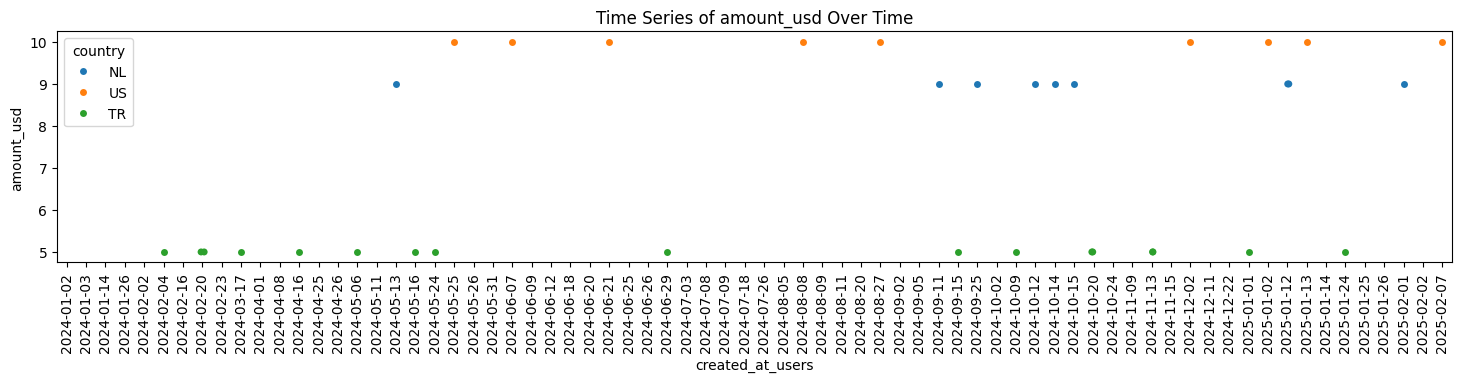

In [578]:
# analysis 1.4
plt.figure(figsize=(18,3))
sns.stripplot(data=df_temp_1, x="created_at_users", y="amount_usd", marker='o', hue='country')
plt.xticks(rotation=90)
plt.title("Time Series of amount_usd Over Time")
plt.show()

**The result: amount_usd is only valid for zero event_names "subscription_renewed" and "subscription_started", and each country has its own pricing system. This system has remained constant over time, with no increases or decreases over a period of about a year.**

### 2. Calculate the total number of trials given to users who came from Instagram.

In [579]:
df_merged

,id_users,created_at_users,attribution_source,country,name,id_events,event_name,amount_usd
0,1,2024-05-07,instagram,US,Eve Brown,1,app_install,NaN
1,1,2024-05-07,instagram,US,Eve Brown,2,trial_started,NaN
2,1,2024-05-07,instagram,US,Eve Brown,3,trial_cancelled,NaN
3,2,2024-10-12,instagram,NL,Frank Moore,4,app_install,NaN
4,2,2024-10-12,instagram,NL,Frank Moore,5,trial_started,NaN
...,...,...,...,...,...,...,...,...
3481,1000,2025-02-13,organic,NL,Jack Anderson,3482,trial_cancelled,NaN
3482,1001,2025-02-16,instagram,US,Bruce Wayne,3483,app_install,NaN
3483,1001,2025-02-16,instagram,US,Bruce Wayne,3484,trial_started,NaN
3484,1001,2025-02-16,instagram,US,Bruce Wayne,3485,subscription_started,9.99


In [580]:
# The following custom filtered data table's row count provides the desired information.
df_merged[(df_merged["attribution_source"] == "instagram") & (df_merged["event_name"] == "trial_cancelled")].shape[0]

61

### 3. Create a new column named 'acquisition_channel' by categorizing users based on their 'attribution_source':
●  **'Paid': users from instagram or tiktok**

●  **'Organic': users from organic sources**


In [581]:
# This time we don't need to proceed through the merged table. The Users table seems to be sufficient.
df_1["acquisition_channel"] = df_1["attribution_source"].map({
    "instagram": "paid",
    "tiktok": "paid",
    "organic": "organic"
})
df_1

,id,created_at,attribution_source,country,name,acquisition_channel
0,1,2024-05-07T00:00:00,instagram,US,Eve Brown,paid
1,2,2024-10-12T00:00:00,instagram,NL,Frank Moore,paid
2,3,2024-10-15T00:00:00,tiktok,TR,Ivy Anderson,paid
3,4,2024-08-28T00:00:00,tiktok,TR,Alice Brown,paid
4,5,2024-04-03T00:00:00,organic,NL,Bob Moore,organic
...,...,...,...,...,...,...
997,998,2025-02-01T00:00:00,instagram,TR,Bob Davis,paid
998,999,2024-12-24T00:00:00,organic,NL,Charlie Davis,organic
999,1000,2025-02-13T00:00:00,organic,NL,Jack Anderson,organic
1000,1001,2025-02-16T00:00:00,instagram,US,Bruce Wayne,paid


In [582]:
# In other way (actually I usually prefer this one by habit)
df_1["acquisition_channel_2"] = np.where(
    df_1["attribution_source"].isin(["instagram", "tiktok"]), "paid",
    np.where(df_1["attribution_source"] == "organic", "organic", None)
)
df_1

,id,created_at,attribution_source,country,name,acquisition_channel,acquisition_channel_2
0,1,2024-05-07T00:00:00,instagram,US,Eve Brown,paid,paid
1,2,2024-10-12T00:00:00,instagram,NL,Frank Moore,paid,paid
2,3,2024-10-15T00:00:00,tiktok,TR,Ivy Anderson,paid,paid
3,4,2024-08-28T00:00:00,tiktok,TR,Alice Brown,paid,paid
4,5,2024-04-03T00:00:00,organic,NL,Bob Moore,organic,organic
...,...,...,...,...,...,...,...
997,998,2025-02-01T00:00:00,instagram,TR,Bob Davis,paid,paid
998,999,2024-12-24T00:00:00,organic,NL,Charlie Davis,organic,organic
999,1000,2025-02-13T00:00:00,organic,NL,Jack Anderson,organic,organic
1000,1001,2025-02-16T00:00:00,instagram,US,Bruce Wayne,paid,paid


### 4. Analyze the trial-to-subscription conversion rate

#### 4.1) Calculate the overall conversion rate

In [583]:
# First lets get the users who start the trial.
users_start_trial = df_2[df_2['event_name'] == "trial_started"]
print("Number of users who start trial:", users_start_trial.shape[0])

Number of users who start trial: 682


In [584]:
# Secondly lets check how many user have a "subscription_started" event among users_start_trial
users_subs = df_2[(df_2['user_id'].isin(users_start_trial.user_id)) & (df_2['event_name'] == "subscription_started")]
print("Number of users who start subscription:", users_subs.shape[0])

Number of users who start subscription: 481


In [585]:
print("Overall conversion rate:", round(users_subs.shape[0]/users_start_trial.shape[0], 2))

Overall conversion rate: 0.71


#### 4.2) Break down the conversion rate by attribution_source

In [586]:
# we have to redefine users_start_trial using df_merged
users_start_trial = df_merged[df_merged['event_name'] == "trial_started"]
users_start_trial.groupby("attribution_source").count()['id_users']

attribution_source
instagram    210
organic      236
tiktok       236
Name: id_users, dtype: int64

In [587]:
users_subs = df_merged[(df_merged['id_users'].isin(users_start_trial.id_users)) & (df_merged['event_name'] == "subscription_started")]
users_subs.groupby("attribution_source").count()['id_users']

attribution_source
instagram    149
organic      169
tiktok       163
Name: id_users, dtype: int64

In above, I wanted to show how the number of users who started the trial and subscribed changed when we divided them into groups for attribution source. Now let's compare them quickly:

In [588]:
conversion_rate = (
    users_subs.groupby("attribution_source").count()['id_users']
    .divide(users_start_trial.groupby("attribution_source").count()['id_users'])
)
print("trial-to-subscription conversion rates grouped by attribution_source:")
print(conversion_rate)

trial-to-subscription conversion rates grouped by attribution_source:
attribution_source
instagram    0.709524
organic      0.716102
tiktok       0.690678
Name: id_users, dtype: float64


### 5. Calculate the median subscription duration (in months) for each country

In [589]:
# df_merged is utilzed because "created_at_users" is already being converted into datetime for that.
print(df_merged.groupby("country")["created_at_users"].median())

country
NL   2024-07-16
TR   2024-08-03
US   2024-07-22
Name: created_at_users, dtype: datetime64[ns]


In [590]:
# Since the "in months" is insisted:
df_merged_M = df_merged.copy()
df_merged_M["created_at_users"] = df_merged_M["created_at_users"].dt.to_period("M")
print(df_merged_M.groupby("country")["created_at_users"].median())

country
NL    2024-07
TR    2024-08
US    2024-07
Name: created_at_users, dtype: period[M]


### 6. Calculate the Average Lifetime Value (LTV) by country


Okay, the LTV represents the total revenue generated per user over their lifetime in your dataset.

In [591]:
# Sum of revenue per country
total_revenue = df_merged.groupby("country")["amount_usd"].sum()

In [592]:
# Unique number of users per country
total_users = df_merged.groupby("country")["id_users"].nunique()

In [593]:
# LTV per country
ltv_per_country = (total_revenue / total_users).fillna(0)

In [594]:
print("Average Lifetime Value (LTV) by Country")
print(ltv_per_country)

Average Lifetime Value (LTV) by Country
country
NL    10.828864
TR     6.427797
US    11.870471
dtype: float64


## Predict the churn probability for user #1002 (Clark Kent)

- Use any relevant features from the dataset 
- Explain your model selection and feature engineering process
- Provide confidence intervals if applicable


In [595]:
df_merged[df_merged['name'] == "Clark Kent"]

,id_users,created_at_users,attribution_source,country,name,id_events,event_name,amount_usd
3485,1002,2025-02-16,organic,TR,Clark Kent,3486,app_install,NaN


Let's recall the event classes first.

In [596]:
df_merged.event_name.unique().tolist()

['app_install',
 'trial_started',
 'trial_cancelled',
 'subscription_started',
 'subscription_renewed',
 'subscription_cancelled']

Given the available data, we do not have sufficient information to make a reliable churn prediction for Clark Kent. Here's why:
- Clark Kent only installed the app—no trials, subscriptions, or cancellations.
- Churn prediction requires post-install interactions (e.g., trial started, payments).

Maybe we can try to evaluate the churn probabilty for Bruce Wayne

In [597]:
df_merged[df_merged['name'] == "Bruce Wayne"]

,id_users,created_at_users,attribution_source,country,name,id_events,event_name,amount_usd
3482,1001,2025-02-16,instagram,US,Bruce Wayne,3483,app_install,NaN
3483,1001,2025-02-16,instagram,US,Bruce Wayne,3484,trial_started,NaN
3484,1001,2025-02-16,instagram,US,Bruce Wayne,3485,subscription_started,9.99


Columns that can be meaningful for churn prediction for Bruce Wayne: "attribution_source" and "country". Did other users with the same attribution_source and country columns experience a different event (row) "subscription_cancelled" or "subscription_renewed" in the time period after "event_name" = "subscription_started"? I can make a prediction based on this. I probably don't need an advanced statistical (or ML) method.

In [598]:
df_churn_bw = df_merged[(df_merged['attribution_source'] == "instagram") & (df_merged['country'] == "US")]
df_churn_bw

,id_users,created_at_users,attribution_source,country,name,id_events,event_name,amount_usd
0,1,2024-05-07,instagram,US,Eve Brown,1,app_install,NaN
1,1,2024-05-07,instagram,US,Eve Brown,2,trial_started,NaN
2,1,2024-05-07,instagram,US,Eve Brown,3,trial_cancelled,NaN
24,7,2024-10-21,instagram,US,Henry Moore,25,app_install,NaN
43,12,2024-01-08,instagram,US,Frank Miller,44,app_install,NaN
...,...,...,...,...,...,...,...,...
3461,995,2024-09-30,instagram,US,Frank Smith,3462,subscription_renewed,9.99
3462,995,2024-09-30,instagram,US,Frank Smith,3463,subscription_cancelled,NaN
3482,1001,2025-02-16,instagram,US,Bruce Wayne,3483,app_install,NaN
3483,1001,2025-02-16,instagram,US,Bruce Wayne,3484,trial_started,NaN


In [599]:
users_subs_started_bw = df_churn_bw[df_churn_bw['event_name'] == "subscription_started"][['id_users', 'created_at_users']]
users_subs_cancelled_bw = df_churn_bw[(df_churn_bw['id_users'].isin(users_subs_started_bw.id_users)) & (df_churn_bw['event_name'] == "subscription_cancelled")][['id_users', 'created_at_users']]
users_subs_renewed_bw = df_churn_bw[(df_churn_bw['id_users'].isin(users_subs_started_bw.id_users)) & (df_churn_bw['event_name'] == "subscription_renewed")][['id_users', 'created_at_users']]

In [600]:
# analysis 2.1
display(users_subs_cancelled_bw.head())
print(f"How many users with the same attribution source and country data as Bruce Wayne canceled their subscription after it started: {len(users_subs_cancelled_bw)}")
display(users_subs_renewed_bw.head())
print(f"How many users with the same attribution source and country data as Bruce Wayne renewed their subscription after it started: {len(users_subs_renewed_bw)}")

,id_users,created_at_users
48,12,2024-01-08
250,73,2024-02-15
315,95,2025-01-26
448,133,2024-08-27
481,144,2024-03-23


How many users with the same attribution source and country data as Bruce Wayne canceled their subscription after it started: 33


,id_users,created_at_users
46,12,2024-01-08
47,12,2024-01-08
248,73,2024-02-15
249,73,2024-02-15
314,95,2025-01-26


How many users with the same attribution source and country data as Bruce Wayne renewed their subscription after it started: 68


In [601]:
df_analysis_cancalled = pd.merge(left= users_subs_started_bw, right=users_subs_cancelled_bw, on="id_users", how="right").rename(columns={"created_at_users_x": "subscription_started", "created_at_users_y": "subscription_cancelled"})
df_analysis_cancalled.head()

,id_users,subscription_started,subscription_cancelled
0,12,2024-01-08,2024-01-08
1,73,2024-02-15,2024-02-15
2,95,2025-01-26,2025-01-26
3,133,2024-08-27,2024-08-27
4,144,2024-03-23,2024-03-23


In [602]:
print("How long did the subscriptions of users who canceled their subscriptions last?")
df_analysis_cancalled["days_difference"] = (df_analysis_cancalled["subscription_started"] - df_analysis_cancalled["subscription_cancelled"]).dt.days
df_analysis_cancalled.days_difference.describe().T

How long did the subscriptions of users who canceled their subscriptions last?


count    33.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: days_difference, dtype: float64

It seems (the saints of dummy data 😇) that all users with the cancelled event had their subscriptions cancelled the same day they started.

Conclusion:
The limited data we have shows us that if Bruce Wayne behaves similarly to users in his own country and with the same attribution_source in his own country, there is an x% chance that he should be churned on the same day, considering the results in analysis 2.1. Of course, if we assume that the current time is different from the time Bruce Wayne subscribed, we can say that the probability of Bruce Wayne being churned is low.


## Predict the potential Lifetime Value (pLTV) for user #1001 (Bruce Wayne)

Explain your methodology and assumptions

In [603]:
df_merged[df_merged['name'] == "Bruce Wayne"]

,id_users,created_at_users,attribution_source,country,name,id_events,event_name,amount_usd
3482,1001,2025-02-16,instagram,US,Bruce Wayne,3483,app_install,NaN
3483,1001,2025-02-16,instagram,US,Bruce Wayne,3484,trial_started,NaN
3484,1001,2025-02-16,instagram,US,Bruce Wayne,3485,subscription_started,9.99


A subscription has started for the user named "Bruce Wayne" (attribution_source == "instagram" , country == "US" ). We can estimate a general estimate for users who are "subscription_started" but have not yet performed the cancalled or renewed event with a simple machine learning model. However, we are asked for the potential LTV of a specific person. I will not use machine learning for this. Instead, I will calculate the LTV values ​​of users who have the same attribution_source value and country as "subscription_started" and make a prediction for Bruce Wayne accordingly.

First, let's update the data with null amount_usd to zero. Because here we will need to make a mathematical calculation on this column.

In [604]:
df_merged['amount_usd'] = df_merged['amount_usd'].fillna(0)

In [605]:
users_has_ltv = df_merged[(df_merged['event_name'] == "subscription_cancelled") | (df_merged['event_name'] == "subscription_renewed")][['id_users']].drop_duplicates().reset_index(drop=True)
users_has_ltv

,id_users
0,2
1,3
2,8
3,9
4,10
...,...
365,991
366,992
367,995
368,996


In [606]:
df_ltv_and_users = df_merged[df_merged['id_users'].isin(users_has_ltv['id_users'])].groupby("id_users")[['amount_usd']].sum()
df_ltv_and_users = df_ltv_and_users.reset_index().rename(columns={"amount_usd": "ltv"})

In [607]:
df_ltv_and_users

,id_users,ltv
0,2,35.96
1,3,19.96
2,8,9.98
3,9,19.98
4,10,19.98
...,...,...
365,991,19.96
366,992,49.95
367,995,29.97
368,996,14.97


In [608]:
df_ltv = df_1.loc[: , ["id", "attribution_source", "country"]]

df_ltv = pd.merge(left=df_ltv, right=df_ltv_and_users, how="left", left_on="id", right_on="id_users").drop(columns="id_users").fillna(0)
df_ltv = df_ltv[df_ltv['id'].isin(df_ltv_and_users['id_users'])]
df_ltv

,id,attribution_source,country,ltv
1,2,instagram,NL,35.96
2,3,tiktok,TR,19.96
7,8,tiktok,TR,9.98
8,9,organic,US,19.98
9,10,organic,US,19.98
...,...,...,...,...
990,991,organic,TR,19.96
991,992,instagram,US,49.95
994,995,instagram,US,29.97
995,996,organic,TR,14.97


Now let's filter these users whose ltv we calculated (attribution_source == "instagram" and country == "US"). Thus, we aim to reach users who exhibit similar behaviors to Bruce Wayne.


In [609]:
df_ltv_bw = df_ltv[(df_ltv['attribution_source'] == "instagram") & (df_ltv['country'] == "US")]
df_ltv_bw

,id,attribution_source,country,ltv
11,12,instagram,US,29.97
72,73,instagram,US,29.97
94,95,instagram,US,19.98
132,133,instagram,US,39.96
143,144,instagram,US,29.97
152,153,instagram,US,19.98
161,162,instagram,US,29.97
207,208,instagram,US,29.97
233,234,instagram,US,49.95
264,265,instagram,US,29.97


analysis 1.4 showed us that the subscription fee for US is 9.99. So how many months did these users stay subscribed?

In [610]:
df_ltv_bw.loc[:, "subs_month"] = (df_ltv_bw["ltv"] / 9.99).astype(int)


C:\Users\Anıl\AppData\Local\Temp\ipykernel_46472\3032245669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ltv_bw.loc[:, "subs_month"] = (df_ltv_bw["ltv"] / 9.99).astype(int)


In [611]:
df_ltv_bw

,id,attribution_source,country,ltv,subs_month
11,12,instagram,US,29.97,3
72,73,instagram,US,29.97,3
94,95,instagram,US,19.98,2
132,133,instagram,US,39.96,4
143,144,instagram,US,29.97,3
152,153,instagram,US,19.98,2
161,162,instagram,US,29.97,3
207,208,instagram,US,29.97,3
233,234,instagram,US,49.95,5
264,265,instagram,US,29.97,3


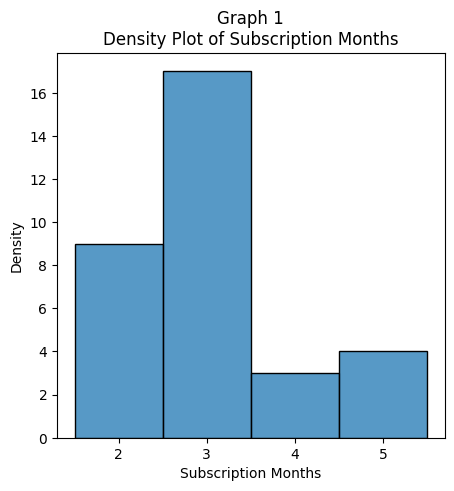

In [619]:
# Set plot size
plt.figure(figsize=(5, 5))

# Plot histogram with properly spaced bins
sns.histplot(data=df_ltv_bw, x="subs_month", bins=np.arange(df_ltv_bw.loc[:, "subs_month"].min() - 0.5, 
                                                            df_ltv_bw.loc[:, "subs_month"].max() + 1.5, 1),
             discrete=True)

# Set x-axis labels to show only whole numbers
plt.xticks(ticks=sorted(df_ltv_bw.loc[:, "subs_month"].unique()), labels=[str(x) for x in sorted(df_ltv_bw.loc[:, "subs_month"].unique())])

# Labels and title
plt.xlabel("Subscription Months")
plt.ylabel("Density")
plt.title("Graph 1\nDensity Plot of Subscription Months")


plt.show()

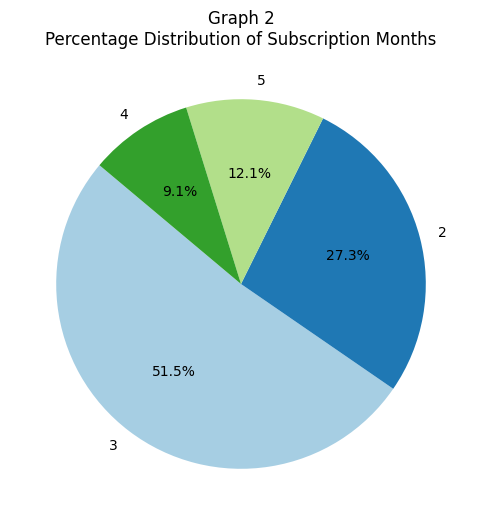

In [620]:
# Count occurrences of each subs_month value
subs_month_counts = df_ltv_bw["subs_month"].value_counts(normalize=True) * 100  # Convert to percentages

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(subs_month_counts, labels=subs_month_counts.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)

# Add title
plt.title("Graph 2\nPercentage Distribution of Subscription Months")

# Show plot
plt.show()


Graphs 1 and 2 also show how long users who use the same attribution_source as Bruce Wayne and live in the same country stay subscribed on average after starting their subscription. Graph 2 provides a nice output to observe Bruce Wayne's possible behavior. Of course, it is useful to note that some users on this graph are still subscribed to the product. Therefore, this statistic does not provide static labeled data.